# ✨ Exercise 12.2 (a) — Change of Measure in Black-Scholes

We consider a classic **Black-Scholes model** (Definition 4.1) and apply **importance sampling** to price a European call option. 📈

---

## 🔁 Part (a): Drift Change via New Measure

For a given parameter $ \lambda \in \mathbb{R} $, define a new probability measure $ \hat{\mathbb{Q}} $ under which the asset price process $ P_t $ satisfies the following SDE:

$$
dP_t = P_t \left[ (r + \lambda)\,dt + \sigma\,d\hat{W}_t \right]
$$

Where:
- $ r $ is the risk-free rate 
- $ \sigma $ is the volatility 
- $ \hat{W}_t $ is a Brownian motion under $ \hat{\mathbb{Q}} $ 

---

In [1]:
import numpy as np

In [391]:
def ISBS(P0,r,sigma,K,T,lam,Nsim):
    Z = np.random.standard_normal(Nsim)
    WT = np.sqrt(T) * Z
    PT = P0 * np.exp((r+lam -0.5*sigma*sigma)*T + sigma*WT)
    DT = np.maximum(PT-K, 0)
    Density = np.exp(-0.5*(lam/sigma)*(lam/sigma)*T-(lam/sigma)*WT)
    Expectation = np.dot(Density, DT) / Nsim
    return np.exp(-r*T) * Expectation


In [392]:
from scipy.stats import norm
def BScall(p0, r, sigma,T,K):
    d1 = (np.log(p0 / K) + (r + 0.5 * sigma * sigma) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = p0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call

In [410]:
P0 = 100
r = 0.01
sigma = 0.2
K = 150
T = 1
print(ISBS(P0,r,sigma,K,T,lam=0.5,Nsim=1000))
print(BScall(P0, r, sigma,T,K))


0.21750908574611547
0.2189977091162567


In [411]:
def ISBSampling(P0,r,sigma,K,T,lam,Nsim):
    Z = np.random.standard_normal(Nsim)
    WT = np.sqrt(T) * Z
    PT = P0 * np.exp((r+lam -0.5*sigma*sigma)*T + sigma*WT)
    DT = np.maximum(PT-K, 0)
    Density = np.exp(-0.5*(lam/sigma)*(lam/sigma)*T-(lam/sigma)*WT)
    return Density * DT * np.exp(-r*T) 

In [ ]:
np.linspace(0,1,9)

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])

In [439]:
import matplotlib.pyplot as plt

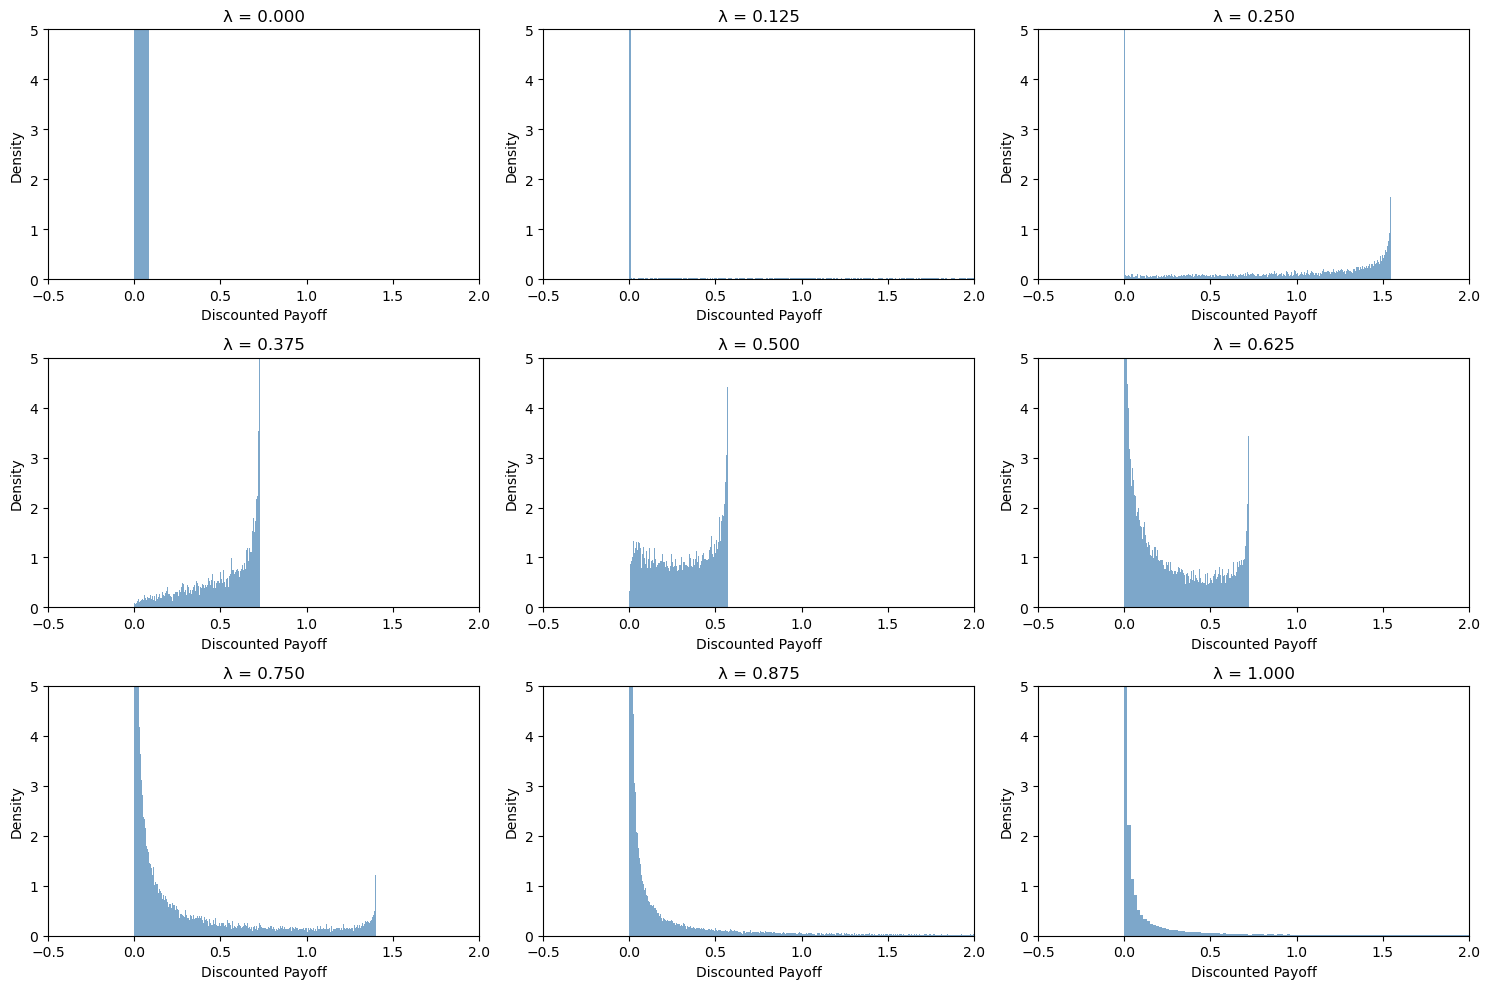

0.219140131277689 4.695958585540885
0.22560856237103744 0.9072169420406918
0.2213582303235727 0.23063494958604908
0.21850846457831946 0.08197098935113423
0.21879775545918972 0.046902422496210495
0.21872835394495224 0.05789727504539005
0.2188663039409287 0.13242059212469706
0.22060143854998446 0.4296728773347893
0.21344698075567295 1.729430841343883


In [441]:
P0 = 100
r = 0.01
sigma = 0.2
K = 150
T = 1
Distributions = []
lambdas = np.linspace(0, 1, 9)
for lam in lambdas:
    Distributions.append(ISBSampling(P0,r,sigma,K,T,lam,Nsim=100_000))
# Plot histograms
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.flatten()

for i, (lam, samples) in enumerate(zip(lambdas, Distributions)):
    axs[i].hist(samples, bins=1000, density=True, alpha=0.7, color='steelblue')
    axs[i].set_title(f'λ = {lam:.3f}')
    axs[i].set_xlim(-0.5, 2)  # adjust if needed
    axs[i].set_ylim(0, 5)
    axs[i].set_xlabel('Discounted Payoff')
    axs[i].set_ylabel('Density')

plt.tight_layout()
plt.show()
for x in Distributions:
    print(np.mean(x),np.var(x))